In [1]:
# import
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
# load data
data = io.loadmat('./data/hw2_prob1.mat')

A = data['A']
M, N = A.shape

In [3]:
# hyper param
ALPHA = 0.01
BETA = 0.5
MAXITERS = 2000
CRIT = 10e-3

In [4]:
## gradient desent method
f_hist = []
t_hist = []

x = np.zeros((N, 1))

for i in range(MAXITERS):

    # f, grad
    f = -np.sum(np.log(1 - A@x)) - np.sum(np.log(1 - x))
    grad = A.T @ (1/(1 - A@x)) + 1/(1 - x)

    if (la.norm(grad) < CRIT): # stop condition
        break

    # search direction (delta_x)
    delta_x = -grad

    # step size (t)
    t = 1
    while (np.max(A@(x + t*delta_x)) >= 1) or (np.max(x + t*delta_x) >= 1): # feasibility check
        t = BETA*t

    while (-np.sum(np.log(1 - A@(x + t*delta_x))) - sum(np.log(1 - (x + t*delta_x))) > f + ALPHA*t*grad.T@delta_x): # line search
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist.append(f)
    t_hist.append(t)

# optimal
f_opt = f
f_opt

np.float64(-187.41647513499353)

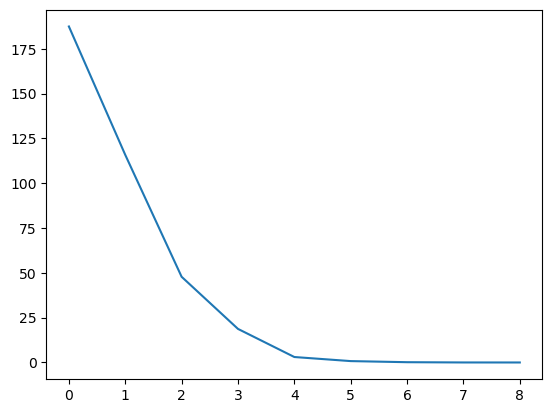

In [ ]:
plt.semilogy(f_hist - f_opt)
plt.show()

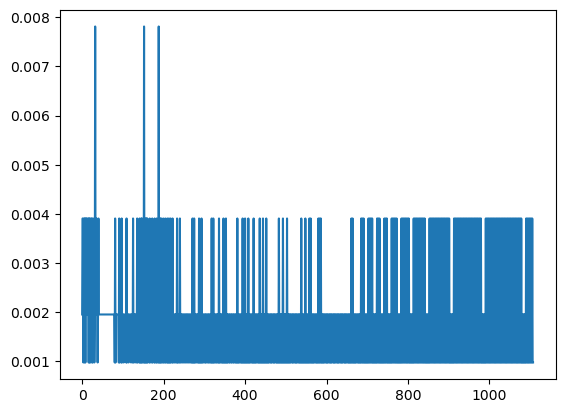

In [6]:
plt.plot(t_hist)

In [7]:
np.diag((1/(1 - A@x)**2)).shape

(1,)

In [8]:
## gradient desent method
f_hist = []
t_hist = []

x = np.zeros((N, 1))

for i in range(MAXITERS):

    # f, grad, hess
    f = -np.sum(np.log(1 - A@x)) - np.sum(np.log(1 - x))
    grad = A.T @ (1/(1 - A@x)) + 1/(1 - x)
    hess = A.T @ np.diag((1/(1 - A@x)**2).flatten()) @ A + np.diag((1/(1 - x)**2).flatten())

    if (la.norm(grad) < CRIT): # stop condition
        break

    # search direction (delta_x)
    delta_x = -la.inv(hess)@grad

    # step size (t)
    t = 1
    while (np.max(A@(x + t*delta_x)) >= 1) or (np.max(x + t*delta_x) >= 1): # feasibility check
        t = BETA*t

    while (-np.sum(np.log(1 - A@(x + t*delta_x))) - sum(np.log(1 - (x + t*delta_x))) > f + ALPHA*t*grad.T@delta_x): # line search
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist.append(f)
    t_hist.append(t)

# optimal
f_opt = f
f_opt

np.float64(-187.41648474785845)

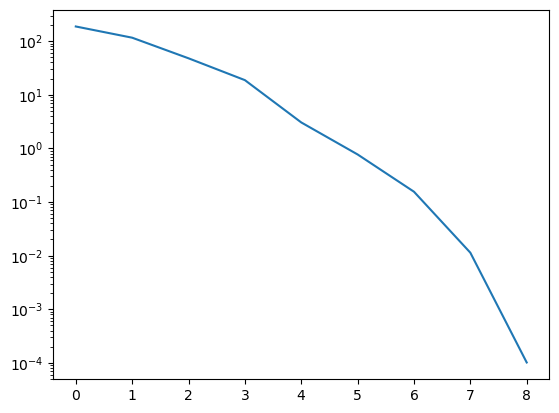

In [9]:
plt.semilogy(f_hist - f_opt)
plt.show()

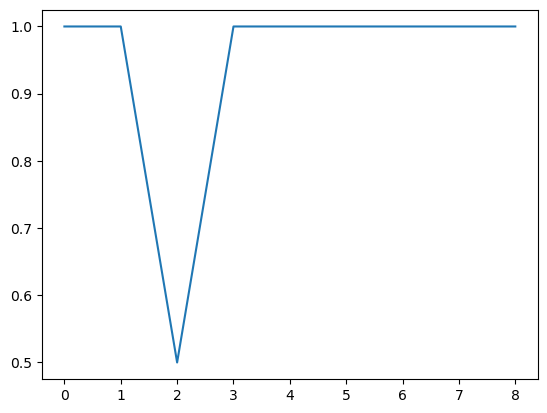

In [10]:
plt.plot(t_hist)
plt.show()